In [1]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t as time
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import sys, os

import moyra as ma
import moyra.elements as ele
import moyra.forces as ef

sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import custom_plot_objects as cpo
import FwtModels.RectWing as rw
import FwtModels.RollRig as RollRig
from matplotlib.lines import Line2D

me.mechanics_printing()


In [3]:
(sm,p) = ma.SymbolicModel.from_file('RollRigModel.py')
sm = sm.subs({p.alpha_r.name:0,p.alpha_1.name:-sym.atan(sym.sin(p.Lambda)*sym.tan(p.q[1])),
             p.alpha_2.name:-sym.atan(sym.sin(p.Lambda)*sym.tan(p.q[2]))})

In [4]:
params = {}
params['c'] = 0.067
params['s'] = 1
params['g'] = 9.81
params['sigma'] = 0.272
params['alpha_r'] = 0
params['c_d_max'] = 1
params['m_w'] = 0.759
params['I_xxw'] = 0.019480411
params['y_w'] = 0
params['z_w'] = 0
params['c_d_max'] = 0
params['T'] = 0.01
params['Lambda'] = np.deg2rad(10)
params['alpha_c'] = np.deg2rad(0)
params['l_f'] = 0.085# 0.0766*np.cos(tmp_params['Lambda'])
params['I_xxf'] = 1.3e-4# 1/12*0.0625*0.085**2# 0#8.85e-5
params['m_f'] = 0.0625
params["AileronAngle"] = 0
params["V"] = 20
params["beta"] = 0 
params["a"] = [np.pi*2]*40
params["fp"] = [0,0,np.deg2rad(10),0,np.deg2rad(10),0]
# params["fp"] = [0]*6

In [5]:
p_vars = vars(p)
for string, value in params.items():
    if string in p_vars:
        p_vars[string].value = value

In [6]:
subs = p.GetSubs(0,params["fp"])
sm_lin = sm.linearise(p)
sm_mini = sm_lin.msubs(subs)

In [8]:
import scipy
(K,M) = sm_mini.gen_eigen_problem(p)
K = np.array(K).astype(np.float64)
M = np.array(M).astype(np.float64)
val,vec = scipy.linalg.eig(K,M)

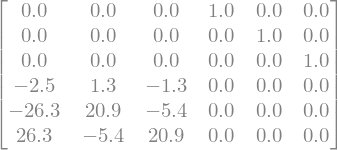

In [9]:
sym.Matrix(np.round(np.linalg.inv(M)@K,1))

In [10]:
pd.DataFrame(ma.extract_eigen_value_data(val,vec))

,Real,Imag,Frequency,Damping,Stable,Eigen Vector,Mode
0,-4.878031e+00,0.0,0.0,NaN,False,"[0.013541061778604098, 0.1416810774771677, -0....",0
1,-1.803989e-17,0.0,0.0,NaN,False,"[-0.5773502691896258, -0.5773502691896258, 0.5...",1
2,4.878031e+00,0.0,0.0,NaN,False,"[0.013541061778604122, 0.14168107747716777, -0...",2
3,-3.944763e+00,0.0,0.0,NaN,False,"[8.20980001478968e-18, 0.17375596047320657, 0....",3
4,3.944763e+00,0.0,0.0,NaN,False,"[-1.5895692966074473e-17, -0.17375596047320577...",4
5,-8.914682e-20,0.0,0.0,NaN,False,"[-0.577350269189626, -0.5773502691896258, 0.57...",5


In [217]:
val

array([ 2.52506138e+00+0.j,  9.76673889e-16+0.j, -9.91836686e+00+0.j,
       -9.11140616e+00+0.j, -9.12238464e+00+0.j,  1.70582080e+00+0.j])